# [Build Elegant Balance-of-Trade Charts with Matplotlib](https://medium.com/data-science-collective/build-elegant-balance-of-trade-charts-with-matplotlib-be805f049b83)

Master The Economist’s clean design approach

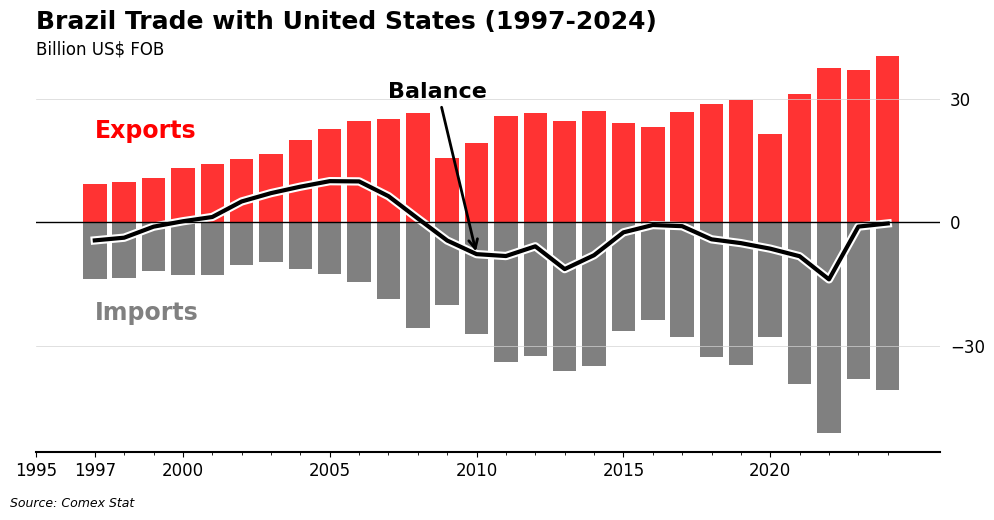

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.patheffects as path_effects
import pandas as pd


# Load the CSV file as a pandas DataFrame:
df = pd.read_csv('https://bit.ly/3Syt4iH')

# Calculate the trade difference (imports are negative values):
df['Difference'] = df['Export'] + df['Import']

# Create the Figure:
fig, ax = plt.subplots(figsize=(10, 5))

# Hide all spines except the bottom:
for spine_name in ['top', 'right', 'left']:
    ax.spines[spine_name].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

# Plot export and import bars:
ax.bar(df['Year'], df['Export'], color='red', alpha=0.8)
ax.bar(df['Year'], df['Import'], color='gray')

# Overlay the net difference line:
line, = ax.plot(df['Year'], df['Difference'], 
                color='k', linestyle='-', linewidth=3)
# Add a white border to line for clarity:
line.set_path_effects([path_effects.Stroke(linewidth=6, 
                                           foreground='white'), 
                       path_effects.Normal()])

# Set up the x-axis ticks:
start_year = int(df['Year'].min())
end_year = int(df['Year'].max())
# Determine first tick that's a multiple of 5, on or before start_year:
first_tick_base = (start_year // 5) * 5
major_ticks = np.arange(first_tick_base, end_year + 1, 5)
# Add start_year if it's not already in the ticks:
if start_year not in major_ticks:
    major_ticks = np.sort(np.append(major_ticks, start_year))
ax.set_xticks(major_ticks)

# Add minor tick marks for every year (without labels):
ax.set_xticks(np.arange(start_year, end_year + 1), minor=True)
ax.xaxis.tick_bottom()  # Ensure ticks appear only at the bottom
ax.tick_params(axis='x', which='both', labelsize=12)
ax.set_xlabel(None)

# Set y-axis ticks and place labels to the right:
MAJOR_TICK_VALUE_Y = 30  # Changes major tick increment
ax.yaxis.tick_right()
# ax.set_ylabel('Billions US$ FOB)', fontsize=13)  # Optional value label
ax.yaxis.set_major_locator(MultipleLocator(MAJOR_TICK_VALUE_Y))
ax.yaxis.set_tick_params(which='both', right=False)  # Remove y-ticks
ax.tick_params(axis='y', which='both', labelsize=12)
ax.grid(axis='y', which='major', color='lightgray', 
        linestyle='-', linewidth=0.5)

# Add a horizontal line at y=0 for clarity:
ax.axhline(0, color='black', linewidth=1)

# Annotate "Exports" and "Imports":
ymin, ymax = ax.get_ylim()
LEGEND_LOC_Y = 25 # Legend label y location
ax.text(start_year, LEGEND_LOC_Y, 'Exports', color='red', 
        fontsize=17, fontweight='bold', va='top', ha='left')
ax.text(start_year, LEGEND_LOC_Y * -1, 'Imports', color='gray', 
        fontsize=17, fontweight='bold', va='bottom', ha='left')

# Annotate "Balance" near the middle of the difference line:
mid_index = len(df) // 2
x_mid = df['Year'].iloc[mid_index]
y_mid = df['Difference'].iloc[mid_index]
ax.annotate("Balance", 
            xy=(x_mid, y_mid), 
            xytext=(x_mid - 3, y_mid + 38),  # Fine tunes text position
            textcoords="data",
            color="black", 
            fontsize=16, 
            fontweight="bold",
            arrowprops=dict(arrowstyle="->", lw=2, color="black"))

# Add title:
title = f"Brazil Trade with {df['Country'].iloc[0]} ({start_year}-{end_year})"
ax.set_title(title, fontsize=18, fontweight='bold', loc='left')

# Add subtitle positioned relative to the axes:
subtitle_text = "Billion US$ FOB"
ax.text(0, 0.95, subtitle_text, ha='left', va='bottom', 
        transform=ax.transAxes, fontsize=12)

# Add source annotation at the lower left of the figure:
plt.figtext(0.01, -0.03, "Source: Comex Stat", ha="left", 
            va="bottom", fontsize=9, fontstyle='italic')

# Adjust the layout:
plt.tight_layout()

plt.show()

Sì, lo script che hai condiviso realizza **un grafico ben strutturato, leggibile ed elegante**. Di seguito ti offro una **breve analisi tecnica**, utile anche per eventuali miglioramenti:

---

### ✅ **Cosa funziona bene**

1. **Visualizzazione combinata barre + linea**:

   * Le **barre per Export/Import** e la **linea per la differenza** sono intuitive e visivamente distinte.
   * L'effetto contorno bianco sulla linea ("path effects") migliora la leggibilità.

2. **Layout pulito**:

   * Nessun bordo laterale o superiore (solo asse x in basso) → stile moderno e meno ingombro visivo.
   * Griglia leggera solo sull’asse y → migliora l’interpretazione senza disturbare.

3. **Annotazioni ben piazzate**:

   * Etichette “Exports” e “Imports” fissate in alto/basso.
   * Freccia e label “Balance” rendono chiaro il significato della linea nera.

4. **Scalatura e tick x ben studiati**:

   * Tick principali ogni 5 anni e minor ticks ogni anno → leggibile ma dettagliato.

5. **Titolo, sottotitolo e fonte**:

   * Struttura gerarchica chiara (titolo + sottotitolo + fonte).
   * Posizionamento coerente e tipografia efficace.

---

### 🛠️ **Suggerimenti (opzionali)**

1. **Gestione degli import negativi**:

   * Attualmente sommi `Export + Import` ma gli `Import` sono già negativi. Se questo è intenzionale (es. per convenzione visiva), ok. Altrimenti potresti voler usare `Export - abs(Import)` o verificare che i valori siano coerenti con la legenda.

2. **Palette più accessibile**:

   * Considera l’uso di una **palette più accessibile per daltonici** (es. rosso-verde è rischioso). Usa rosso-blu oppure arancio-grigio-blu.

3. **Legend automatica (in alternativa al testo fisso)**:

   ```python
   ax.bar(..., label='Export')
   ax.bar(..., label='Import')
   ax.plot(..., label='Balance')
   ax.legend(loc='upper left', fontsize=12)
   ```

4. **Eventuale salvataggio automatico**:
   Per esportare direttamente il grafico:

   ```python
   plt.savefig("brazil_trade.png", dpi=300, bbox_inches='tight')
   ```

5. **Versione multigrafico**:
   Se vuoi usare lo stesso stile per altri Paesi, puoi incapsulare il tutto in una funzione parametrica.

---


